# 911 Calls Capstone Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("911.csv")

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [4]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [5]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

## Creating new features

Creating a new column 'Reason' from 'title' to check to reason and make other analyses later.

** What is the most common Reason for a 911 call based off of this new column? **

In [6]:
df['Reason'] = df['title'].apply(lambda x: x.split(":")[0])
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='Reason', ylabel='Count'>

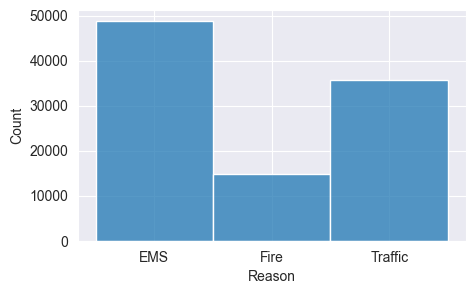

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Reason')

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda x: int(x.day_of_week))
df.head(2)[['Reason', 'Hour', 'Month', 'DayOfWeek']]

,Reason,Hour,Month,DayOfWeek
0,EMS,17,12,3
1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() dmap dictionary to map the actual string names to the day of the week: **

In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)
df.head(2)[['Reason', 'Hour', 'Month', 'DayOfWeek']]

,Reason,Hour,Month,DayOfWeek
0,EMS,17,12,Thu
1,EMS,17,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

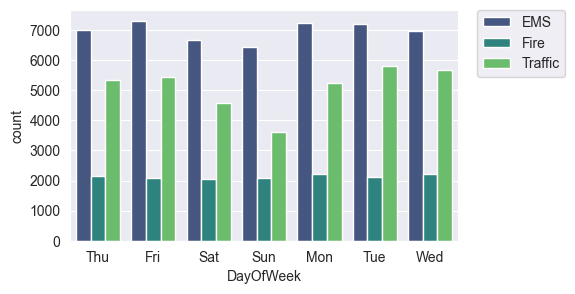

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='DayOfWeek', hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()

**Now do the same for Month:**

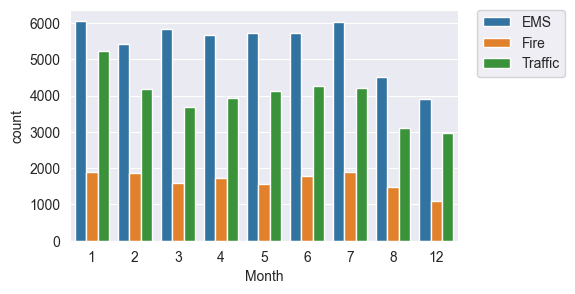

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Month', hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)
plt.show()

**Did you notice something strange about the Plot?**


Don't exist data about the months: 9,10 and 11. So we can create a lineplot.

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

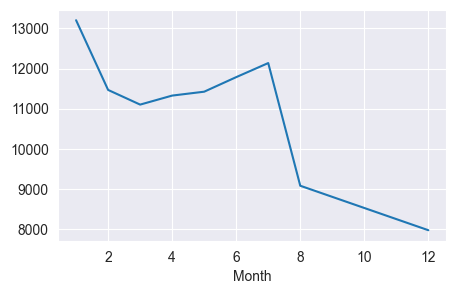

In [23]:
plt.figure(figsize=(5,3))
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

<Figure size 500x300 with 0 Axes>

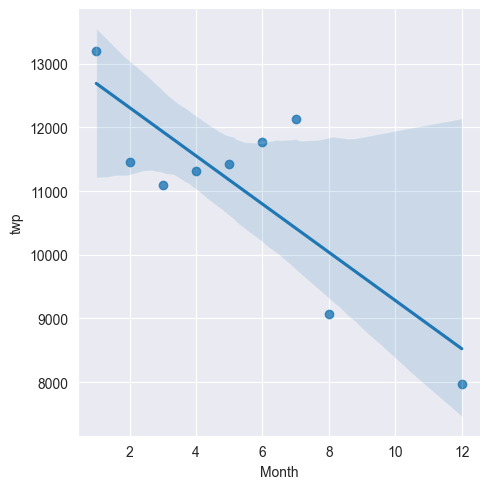

In [24]:
plt.figure(figsize=(5,3))
sns.lmplot(data=byMonth.reset_index(),x='Month',y='twp')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head(2)[['Reason', 'Hour', 'Month', 'DayOfWeek','Date']]

,Reason,Hour,Month,DayOfWeek,Date
0,EMS,17,12,Thu,2015-12-10
1,EMS,17,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [58]:
byDate = df.groupby('Date').count()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

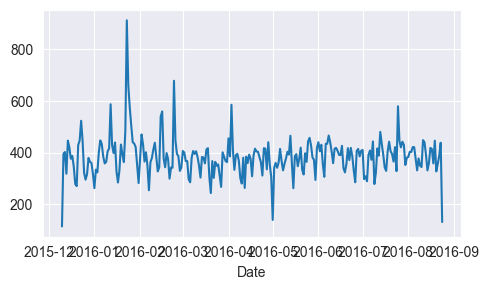

In [28]:
plt.figure(figsize=(5,3))
byDate['lat'].plot()
plt.tight_layout()

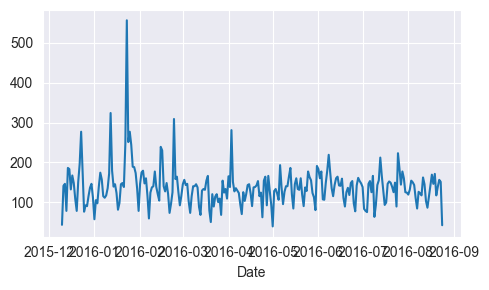

In [29]:
plt.figure(figsize=(5,3))
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

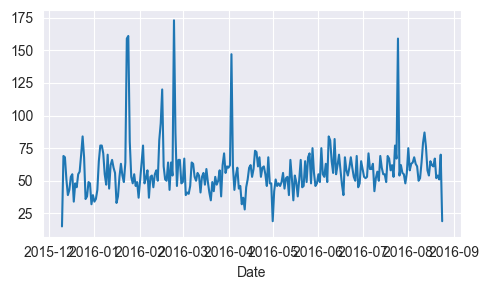

In [30]:
plt.figure(figsize=(5,3))
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

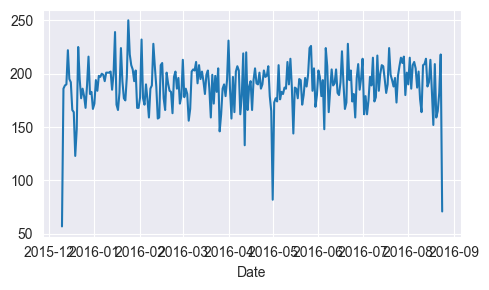

In [31]:
plt.figure(figsize=(5,3))
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [59]:
dayHour = df.groupby(by=['DayOfWeek', 'Hour']).count()['Reason'].unstack()

** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

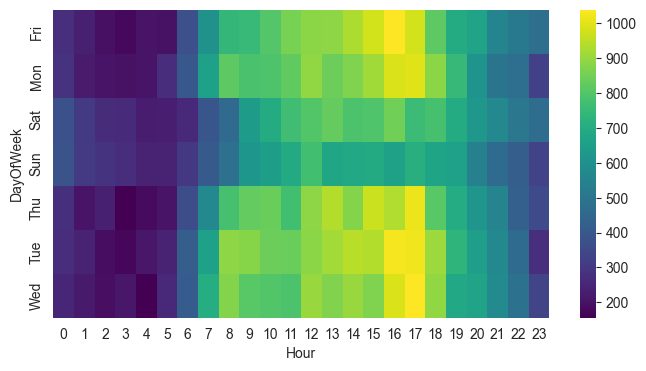

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dayHour,cmap='viridis')

Not a lot of calls are happening between hours of 0 and 5. Everyone's asleep.

All call tend to occur during the daytime (7-17).

Not too many of them tend to occur on Sundays and Saturdays.


** Now create a clustermap using this DataFrame. **

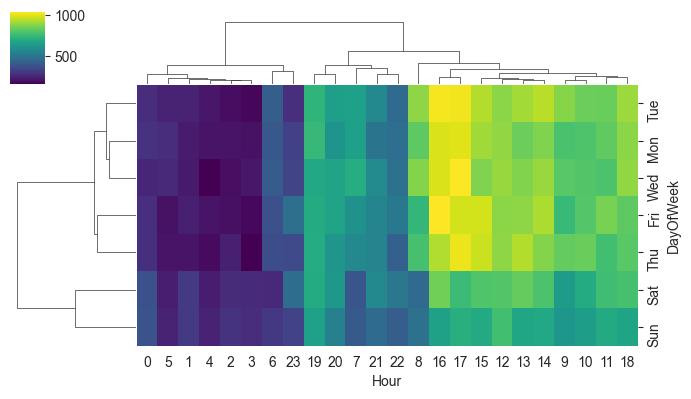

In [51]:
sns.clustermap(dayHour, cmap='viridis',figsize=(7,4))

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [60]:
dayMonth = df.groupby(by=['DayOfWeek', 'Month']).count()['Reason'].unstack()

<Axes: xlabel='Month', ylabel='DayOfWeek'>

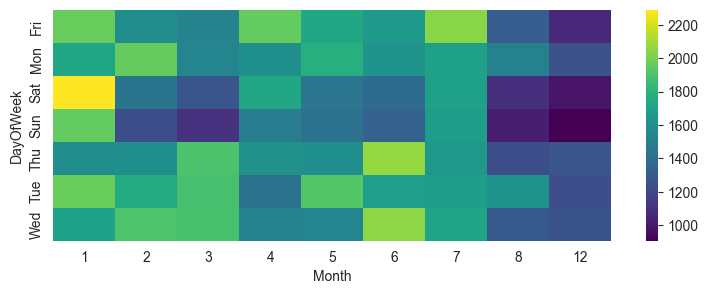

In [55]:
fig, ax = plt.subplots(figsize=(9, 3))
sns.heatmap(dayMonth,cmap='viridis')

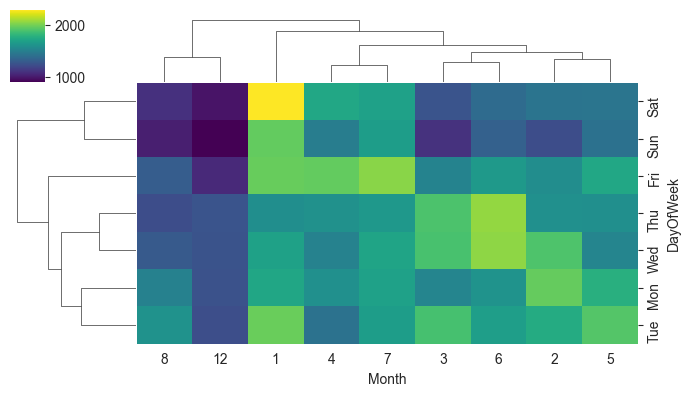

In [57]:
sns.clustermap(dayMonth,cmap='viridis',figsize=(7,4))